<a href="https://colab.research.google.com/github/KJLumalang/ITBA-3206_Planeteers/blob/main/ITBA_3206_Planeteers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Driving Down Greenhouse Gas Emissions through Clean Energy**

The goal of this analysis is to analyze and show the increasing amount of 
emissions and which or what are the sources of these emissions. The means of 
data analysis will help to provide possible solutions to the massive and 
increasing amount of greenhouse gas emissions. 


# **Libraries and Data Set**

---



Importing libraries and data sets

In [348]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [349]:
pd.option_context('display.max_rows', None)
pd.option_context('display.max_columns', None)

In [350]:
df = pd.read_csv('https://raw.githubusercontent.com/KJLumalang/ITBA-3206_Planeteers/main/historical_emissions.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/KJLumalang/ITBA-3206_Planeteers/main/natural-disaster-deaths-ihme.csv')


# **Data Cleaning**

---



In [351]:
df.head(579)
display(df)

,Country,Data source,Sector,Gas,Unit,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Energy,All GHG,MtCO₂e,37636.10,37603.22,36777.63,36188.89,36173.70,...,25389.87,25257.77,25075.28,24656.11,24150.88,23501.77,23395.58,23265.41,23365.41,23244.24
1,World,CAIT,Electricity/Heat,All GHG,MtCO₂e,15834.64,15875.48,15416.96,15081.51,15059.71,...,10172.97,10123.51,9895.91,9624.07,9268.36,9074.97,8978.95,8929.03,8768.70,8627.95
2,China,CAIT,Energy,All GHG,MtCO₂e,10618.71,10432.77,10025.78,9806.69,9860.68,...,3236.82,3340.24,3252.67,3198.31,3227.72,2899.43,2787.71,2571.87,2474.85,2360.68
3,World,CAIT,Transportation,All GHG,MtCO₂e,8434.96,8417.75,8278.48,8073.90,7923.23,...,5731.34,5566.90,5440.03,5360.38,5148.97,5012.39,4913.80,4871.85,4764.85,4725.54
4,China,CAIT,Electricity/Heat,All GHG,MtCO₂e,5616.35,5405.58,5060.66,4721.35,4616.44,...,1439.69,1416.39,1334.53,1336.76,1191.43,1088.00,1002.36,881.91,798.08,728.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Nepal,CAIT,Electricity/Heat,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.05,0.09,0.09,0.03,0.03,0.07,0.06,0.04,0.03,0.00
575,Paraguay,CAIT,Electricity/Heat,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.03,0.02,0.02,0.03,0.11,0.01,0.03,0.04,0.04,0.04
576,Eswatini,CAIT,Electricity/Heat,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
577,Tuvalu,CAIT,Transportation,All GHG,MtCO₂e,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [352]:
df2.head()
display(df2)

,Entity,Code,Year,Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,1347
2,Afghanistan,AFG,1992,614
3,Afghanistan,AFG,1993,225
4,Afghanistan,AFG,1994,160
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,15
6836,Zimbabwe,ZWE,2016,31
6837,Zimbabwe,ZWE,2017,251
6838,Zimbabwe,ZWE,2018,0


In [353]:
df2.rename(columns = {'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)':'Deaths_Total'}, inplace = True)


Removing unecessary column

In [354]:
df2 = df2.drop(columns = 'Code')
df2

,Entity,Year,Deaths_Total
0,Afghanistan,1990,0
1,Afghanistan,1991,1347
2,Afghanistan,1992,614
3,Afghanistan,1993,225
4,Afghanistan,1994,160
...,...,...,...
6835,Zimbabwe,2015,15
6836,Zimbabwe,2016,31
6837,Zimbabwe,2017,251
6838,Zimbabwe,2018,0


In [355]:
df = df.drop(columns = 'Data source')
df = df.drop(columns = 'Unit')
df

,Country,Sector,Gas,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,Energy,All GHG,37636.10,37603.22,36777.63,36188.89,36173.70,36279.47,36184.99,...,25389.87,25257.77,25075.28,24656.11,24150.88,23501.77,23395.58,23265.41,23365.41,23244.24
1,World,Electricity/Heat,All GHG,15834.64,15875.48,15416.96,15081.51,15059.71,15336.57,15390.22,...,10172.97,10123.51,9895.91,9624.07,9268.36,9074.97,8978.95,8929.03,8768.70,8627.95
2,China,Energy,All GHG,10618.71,10432.77,10025.78,9806.69,9860.68,9959.18,9958.66,...,3236.82,3340.24,3252.67,3198.31,3227.72,2899.43,2787.71,2571.87,2474.85,2360.68
3,World,Transportation,All GHG,8434.96,8417.75,8278.48,8073.90,7923.23,7685.67,7558.39,...,5731.34,5566.90,5440.03,5360.38,5148.97,5012.39,4913.80,4871.85,4764.85,4725.54
4,China,Electricity/Heat,All GHG,5616.35,5405.58,5060.66,4721.35,4616.44,4712.49,4766.22,...,1439.69,1416.39,1334.53,1336.76,1191.43,1088.00,1002.36,881.91,798.08,728.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Nepal,Electricity/Heat,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.05,0.09,0.09,0.03,0.03,0.07,0.06,0.04,0.03,0.00
575,Paraguay,Electricity/Heat,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.02,0.02,0.03,0.11,0.01,0.03,0.04,0.04,0.04
576,Eswatini,Electricity/Heat,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
577,Tuvalu,Transportation,All GHG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Removing uneeded rows

In [356]:
df2.drop(df2.index[df2['Entity'] == 'African Region (WHO)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'East Asia & Pacific (WB)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'Eastern Mediterranean Region (WHO)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'Eastern Mediterranean Region (WHO)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'Europe & Central Asia (WB)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'European Region (WHO)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'G20'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'Latin America & Caribbean (WB)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'Middle East & North Africa (WB)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'North America (WB)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'OECD Countries'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'Region of the Americas (WHO)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'South Asia (WB)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'Sub-Saharan Africa (WB)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'Western Pacific Region (WHO)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'World Bank High Income'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'World Bank Low Income'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'World Bank Higher Middle Income'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'World Bank Lower Middle Income'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'World Bank Upper Middle Income'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'South-East Asia Region (WHO)'], inplace=True)
df2.drop(df2.index[df2['Entity'] == 'World'], inplace=True)


Finding cells with null values and replacing them with N/A

In [357]:
df2.isnull().sum()

Entity          0
Year            0
Deaths_Total    0
dtype: int64

In [358]:
df.isnull().sum()

Country     0
Sector      0
Gas         0
2019        0
2018        0
2017        0
2016        0
2015        0
2014        0
2013        0
2012        0
2011        2
2010        2
2009        2
2008        2
2007        2
2006        2
2005        2
2004        4
2003        4
2002        4
2001        4
2000        4
1999        8
1998        8
1997        8
1996        8
1995        8
1994       10
1993       10
1992       10
1991       12
1990       15
dtype: int64

Showing rows with null value

In [359]:
nan_rows  = df.loc[df.isna().any(axis=1)]
display(nan_rows)


,Country,Sector,Gas,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
218,Laos,Electricity/Heat,All GHG,14.06,14.10,13.99,10.92,3.73,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,Cambodia,Transportation,All GHG,5.88,5.42,4.96,4.66,4.21,3.82,3.49,...,1.40,1.44,1.24,1.19,1.19,NaN,NaN,NaN,NaN,NaN
328,Cambodia,Electricity/Heat,All GHG,4.70,3.89,3.66,3.40,2.39,1.53,0.73,...,0.34,0.31,0.26,0.20,0.16,NaN,NaN,NaN,NaN,NaN
343,Namibia,Energy,All GHG,3.94,3.94,3.98,3.98,3.99,3.76,3.63,...,2.07,2.11,2.06,2.01,1.85,1.71,1.49,1.29,1.19,NaN
375,Laos,Transportation,All GHG,2.52,3.18,3.10,3.05,2.40,2.28,1.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,Namibia,Transportation,All GHG,2.09,2.12,2.10,2.11,2.12,2.03,1.92,...,1.17,1.14,1.10,1.07,0.64,0.59,0.55,0.53,0.49,NaN
408,Montenegro,Electricity/Heat,All GHG,1.53,1.49,1.29,1.26,1.56,1.49,1.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,Suriname,Electricity/Heat,All GHG,1.09,0.97,1.04,1.23,1.53,1.43,1.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,Suriname,Transportation,All GHG,0.91,0.70,0.85,1.03,0.70,0.69,0.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,South Sudan,Transportation,All GHG,0.85,0.75,0.75,0.96,1.04,0.99,0.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replacing null values with N/A

In [360]:
df = df.fillna('N/A')

Checking if there are no null values anymore

In [361]:
df.isnull().sum()

Country    0
Sector     0
Gas        0
2019       0
2018       0
2017       0
2016       0
2015       0
2014       0
2013       0
2012       0
2011       0
2010       0
2009       0
2008       0
2007       0
2006       0
2005       0
2004       0
2003       0
2002       0
2001       0
2000       0
1999       0
1998       0
1997       0
1996       0
1995       0
1994       0
1993       0
1992       0
1991       0
1990       0
dtype: int64

# **Visualization**

---



**Energy**

Filtering by Energy sector

In [362]:
energy_data = df.loc[df['Sector'] == 'Energy']
display(energy_data)

,Country,Sector,Gas,2019,2018,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,Energy,All GHG,37636.10,37603.22,36777.63,36188.89,36173.70,36279.47,36184.99,...,25389.87,25257.77,25075.28,24656.11,24150.88,23501.77,23395.58,23265.41,23365.41,23244.24
2,China,Energy,All GHG,10618.71,10432.77,10025.78,9806.69,9860.68,9959.18,9958.66,...,3236.82,3340.24,3252.67,3198.31,3227.72,2899.43,2787.71,2571.87,2474.85,2360.68
5,United States,Energy,All GHG,5246.37,5372.73,5177.80,5239.70,5355.68,5471.15,5435.44,...,5876.78,5863.62,5817.29,5546.45,5387.41,5334.97,5255.97,5147.1,5073.75,5112.27
6,European Union (27),Energy,All GHG,2731.36,2869.38,2935.99,2915.36,2905.92,2845.27,2998.50,...,3347.54,3407.89,3419.04,3492.09,3389.17,3336.96,3357.54,3412.3,3535.21,3569.46
7,India,Energy,All GHG,2422.24,2421.71,2305.08,2177.18,2144.32,2133.15,1963.54,...,924.19,863.68,848.91,805.05,770.77,718.91,685.7,661.97,645.15,602.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Cook Islands,Energy,All GHG,0.09,0.09,0.09,0.08,0.07,0.08,0.08,...,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.04
535,Kiribati,Energy,All GHG,0.09,0.09,0.09,0.07,0.06,0.06,0.06,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02
549,Nauru,Energy,All GHG,0.06,0.06,0.07,0.06,0.06,0.05,0.05,...,0.09,0.1,0.1,0.1,0.11,0.11,0.11,0.12,0.13,0.13
563,Niue,Energy,All GHG,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


Top 5 Country and Their GHG Emission by Energy Sector as year passed by

In [363]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
print("1990 World Emission is 23.2 Gt")
display(energy_data.loc[0:8,["Country","1990"]], )
print("2010 World Emission is 34.2 Gt")
display(energy_data.loc[0:8,["Country","2010"]], )
print("2019 World Emission is 37.6 Gt")
display(energy_data.loc[0:8,["Country","2019"]], )

1990 World Emission is 23.2 Gt


,Country,1990
0,World,23244.24
2,China,2360.68
5,United States,5112.27
6,European Union (27),3569.46
7,India,602.05
8,Russia,2639.05


2010 World Emission is 34.2 Gt


,Country,2010
0,World,34193.57
2,China,8485.09
5,United States,5700.68
6,European Union (27),3225.42
7,India,1668.13
8,Russia,2046.1


2019 World Emission is 37.6 Gt


,Country,2019
0,World,37636.10
2,China,10618.71
5,United States,5246.37
6,European Union (27),2731.36
7,India,2422.24
8,Russia,2208.96


Bar plot of emission 

TypeError: ignored

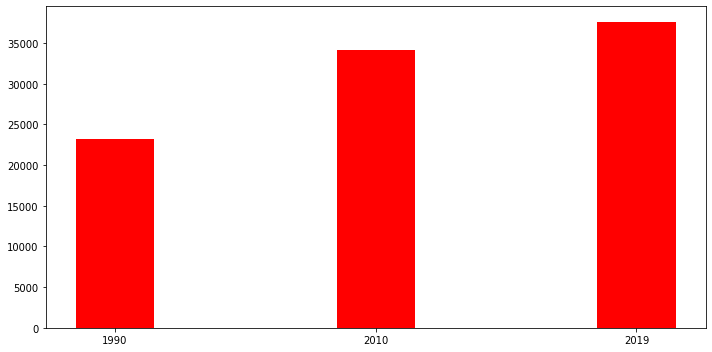

In [368]:
data = {'1990':23244, '2010':34194, '2019':37636}
year = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, values, color ='red', width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("World's Emission Amount")
plt.title("Green House Gas Emission in Energy Sector")
plt.show()

**Electricity/Heat**

Filtering by Electricity/Heat

In [ ]:
electricity_data = df.loc[df['Sector'] == 'Electricity/Heat']
display(electricity_data)

Top 5 Country and their GHG emission by Electricity/Heat under Energy Sector as year passed by

In [ ]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
print("1990 Emission")
display(electricity_data.loc[0:20,["Country","1990"]], )
print("2010 Emission")
display(electricity_data.loc[0:20,["Country","2010"]], )
print("2019 Emission")
display(electricity_data.loc[0:20,["Country","2019"]], )

Bar plot of emission

In [ ]:
data = {'1990':8628, '2010':14211, '2019':15834}
year = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, values, color ='yellow',
        width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("World's Emission Amount")
plt.title("Green House Gas Emission in Electricity/Heat under Energy Sector")
plt.show()

**Transportation**

Filtering by Transportation

In [ ]:
transportation_data = df.loc[df['Sector'] == 'Transportation']
display(transportation_data)

Top 5 Country and their GHG emission by Transportation under Energy Sector as year passed by

In [ ]:
from IPython.display import HTML, display

display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
print("1990 Emission")
display(transportation_data.loc[0:41,["Country","1990"]], )
print("2010 Emission")
display(transportation_data.loc[0:41,["Country","2010"]], )
print("2019 Emission")
display(transportation_data.loc[0:41,["Country","2019"]], )

Bar plot of emission

In [ ]:
data = {'1990':4726, '2010':7189, '2019':8435}
year = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, values, color ='blue',
        width = 0.3)
 
plt.xlabel("Year")
plt.ylabel("World's Emission Amount")
plt.title("Green House Gas Emission in Transportation under Energy Sector")
plt.show()

Combined chart of Electricity and Transportation Emission. It shows the diffence in amount of emission.



In [ ]:
year = [1990, 2000,2010, 2019]

electricity =[8628, 10597, 14211,15834]

transpo =[4726, 5914, 7189, 8435]


plt.fill_between(year, electricity, color="yellow",
                 alpha=0.5, label='Electricity')
plt.fill_between(year, transpo, color="blue",
                 alpha=0.5, label='Transportation')


plt.xlabel("Year")
plt.ylabel("World's Emission Amount")

plt.legend()
plt.show()



Under Energy sector are electricity/heat and transportation emission. This plot show the differences of emission between the three.

In [ ]:
year = [1990, 2000, 2010, 2019]

electricity =[8628, 10597, 14211, 15834]

transpo =[4726, 5914, 7189, 8435]


energy =[23244, 26576, 34194, 37636]

plt.fill_between(year, energy, color="red",
                 alpha=0.5, label='Energy')

plt.fill_between(year, electricity, color="yellow",
                 alpha=0.5, label='Electricity')
plt.fill_between(year, transpo, color="blue",
                 alpha=0.5, label='Transportation')


plt.xlabel("Year")
plt.ylabel("World's Emission Amount")

plt.legend()
plt.show()

Analysis shows the increase of greenhouse gas emission from 1990 to 2019. It also shows which countries has the most emission.

**Natural Disaster**

In [370]:
new_df = df2.sort_values('Deaths_Total', ascending=False).groupby('Year').head(2)
print (new_df)

             Entity  Year  Deaths_Total
2540          Haiti  2010        222641
2684      Indonesia  2004        166020
451      Bangladesh  1991        139252
3918        Myanmar  2008        138366
1158          China  2008         88421
4455       Pakistan  2005         74056
2700           Iran  1990         40042
5624      Sri Lanka  2004         35405
6489      Venezuela  1999         30342
2713           Iran  2003         26817
2651          India  2001         20783
2901          Japan  2011         18397
6129         Turkey  1999         17982
2558       Honduras  1998         14600
4673    Philippines  2013         14246
2643          India  1993         11251
4015          Nepal  2015          9034
2686      Indonesia  2006          7342
1160          China  2010          7175
8       Afghanistan  1998          7123
4651    Philippines  1991          6793
2663          India  2013          6562
1146          China  1996          5615
2885          Japan  1995          5521


In [371]:
deaths_year1 = df2.loc[df2['Year'] == 1990]
deaths_year2 = df2.loc[df2['Year'] == 2000]
deaths_year3 = df2.loc[df2['Year'] == 2019]



Year 1990 Top 10 Countries with total of deaths

Sorting by death total and year

In [372]:
deaths_year1.sort_values(by=['Deaths_Total'], inplace=True, ascending=False)
deaths_year1.head(n=10)

result = deaths_year1.head(10)

display(result)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Entity,Year,Deaths_Total
2700,Iran,1990,40042
4650,Philippines,1990,3330
2640,India,1990,2097
1140,China,1990,1324
450,Bangladesh,1990,905
4620,Peru,1990,294
2670,Indonesia,1990,230
6330,United States,1990,230
5880,Tanzania,1990,189
6510,Vietnam,1990,184


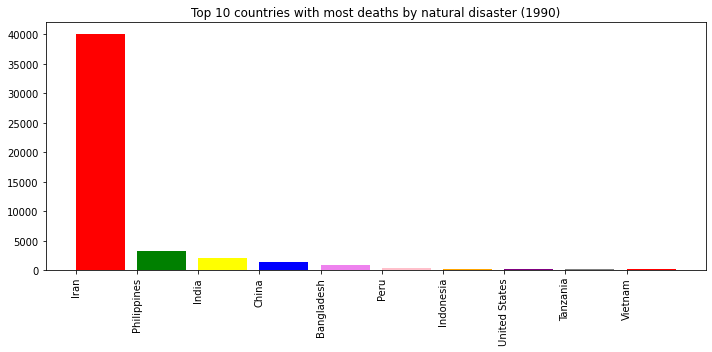

In [379]:
x = result['Entity']
h = result['Deaths_Total']
fig = plt.figure(figsize = (10, 5))
plt.bar(x, h, align = 'edge', color=['red','green','yellow','blue','violet','pink','orange','purple', 'gray'])
plt.title("Top 10 countries with most deaths by natural disaster (1990)")
plt.xticks(rotation=90)
plt.show()

Year 2000 Top 10 Countries with total of deaths

Sorting by death total and year

In [374]:
deaths_year2.sort_values(by=['Deaths_Total'], inplace=True, ascending=False)
deaths_year2.head(n=10)

result2 = deaths_year2.head(10)

display(result2)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Entity,Year,Deaths_Total
2650,India,2000,2273
3880,Mozambique,2000,832
4660,Philippines,2000,747
1150,China,2000,679
6520,Vietnam,2000,592
2680,Indonesia,2000,539
940,Cambodia,2000,347
1180,Colombia,2000,212
670,Bhutan,2000,200
3640,Mexico,2000,184


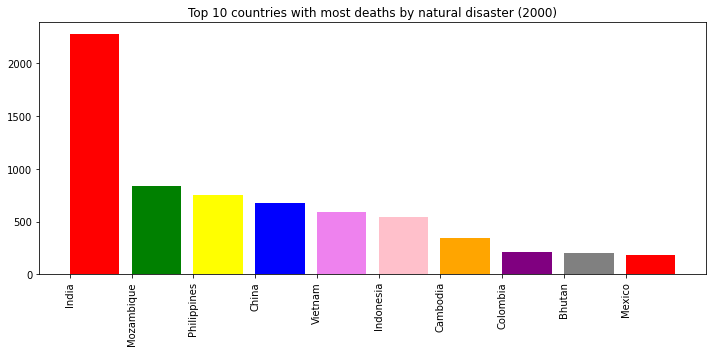

In [381]:

x = result2['Entity']
h = result2['Deaths_Total']
fig = plt.figure(figsize = (10, 5))
plt.bar(x, h, align = 'edge', color=['red','green','yellow','blue','violet','pink','orange','purple', 'gray'] )
plt.title("Top 10 countries with most deaths by natural disaster (2000)")
plt.xticks(rotation=90)
plt.show()

Year 2019 Top 10 Countries with total of deaths

Sorting by death total and year

In [376]:
deaths_year3.sort_values(by=['Deaths_Total'], inplace=True, ascending=False)
deaths_year3.head(n=10)

result3 = deaths_year3.head(10)

display(result3)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Entity,Year,Deaths_Total
2669,India,2019,2065
6839,Zimbabwe,2019,660
3899,Mozambique,2019,643
2699,Indonesia,2019,621
1169,China,2019,295
4469,Pakistan,2019,225
479,Bangladesh,2019,131
29,Afghanistan,2019,128
2729,Iran,2019,126
4019,Nepal,2019,119


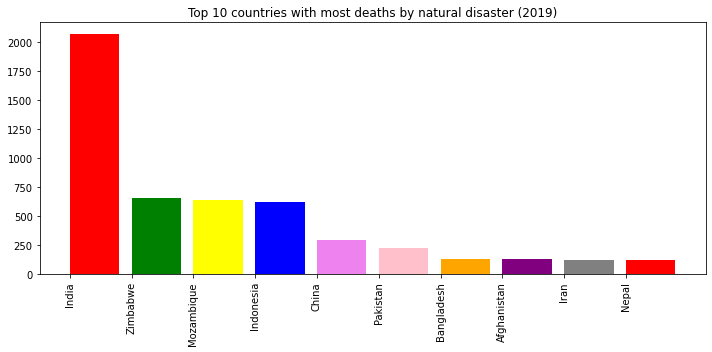

In [380]:
x = result3['Entity']
h = result3['Deaths_Total']
fig = plt.figure(figsize = (10, 5))
plt.bar(x, h, align = 'edge', color=['red','green','yellow','blue','violet','pink','orange','purple', 'gray'] )
plt.title("Top 10 countries with most deaths by natural disaster (2019)")
plt.xticks(rotation=90)
plt.show()